- MLPRegressor: 學習和預測連續數值型的目標變數，MLPClassifier: 則適用於學習和預測離散的分類型目標變數。
- 如果要預測空氣品質 PM2.5 的值，通常會使用 MLPRegressor 模型，因為 PM2.5 的數值是連續的，而不是離散的類別。而使用不同類別的資料來預測 PM2.5 的值，也應該使用 MLPRegressor 模型，因為它們所使用的特徵（例如人口、土地、交通等）都是連續的，而不是離散的類別。

# 動態資料量

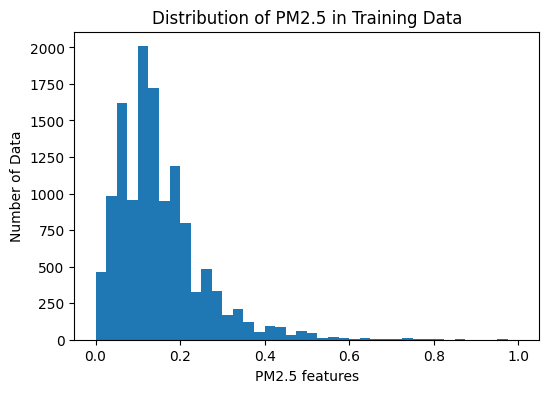

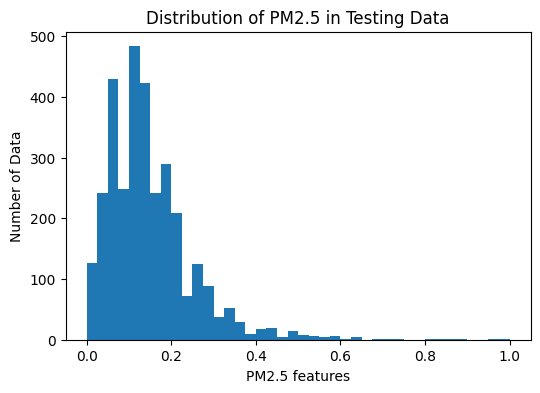

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 读取数据并进行预处理
data = pd.read_csv('動態資料.csv')
# 將資料量乘以二
data = pd.concat([data, data], ignore_index=True)

data = data.drop(['Cloud'], axis=1)
data = data[~data.apply(lambda row: any('#' in str(cell) for cell in row), axis=1)]
data = data.dropna(axis=0, how='any')
data['TIME'] = pd.to_datetime(data['TIME'])
data['Year'] = data['TIME'].dt.year
data['Month'] = data['TIME'].dt.month
data['Day'] = data['TIME'].dt.day
data['Hour'] = data['TIME'].dt.hour
data = data.drop(['TIME'], axis=1)
scaler = MinMaxScaler()

# 删除非数值、浮点数的行
numeric_cols = ['AMB_TEMP', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5', 'RAINFALL', 'RH', 'SO2', 'THC', 'WD_HR', 'WIND_DIREC', 'WIND_SPEED', 'WS_HR', 'GloblRad']
data = data[numeric_cols].apply(pd.to_numeric, errors='coerce')
data = data.dropna(axis=0, how='any')

data_scaled = scaler.fit_transform(data)

# 划分输入和输出
X = data_scaled[:, [col for col in range(data_scaled.shape[1]) if col != 8]]  # 除第九列之外的所有列
y = data_scaled[:, 9]  # 通过索引位置获取第9列（PM2_5）

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建随机森林模型
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 训练模型
model.fit(X_train, y_train)

# 在测试集上进行预测
y_test_pred = model.predict(X_test)

# 計算訓練集和測試集的資料量
train_data_size = len(X_train)
test_data_size = len(X_test)

# 繪製訓練集的資料量與PM2.5分布區間的關係
plt.figure(figsize=(6, 4))
plt.hist(y_train, bins=40)
plt.xlabel('PM2.5 features')
plt.ylabel('Number of Data')
plt.title('Distribution of PM2.5 in Training Data')
plt.show()

# 繪製測試集的資料量與PM2.5分布區間的關係
plt.figure(figsize=(6, 4))
plt.hist(y_test, bins=40)
plt.xlabel('PM2.5 features')
plt.ylabel('Number of Data')
plt.title('Distribution of PM2.5 in Testing Data')
plt.show()

In [ ]:
# 計算訓練集和測試集的實際數量
train_data_size = len(X_train)
test_data_size = len(X_test)

# 輸出訓練集和測試集的實際數量
print("Training Data Size:", train_data_size)
print("Testing Data Size:", test_data_size)


Training Data Size: 12816
Testing Data Size: 3204


# 動態 - RF
- 随机森林模型不需要对输入进行形状转换（reshape），因此在此示例中没有进行任何形状转换。

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 读取数据并进行预处理
data = pd.read_csv('動態資料.csv')
data = data.drop(['Cloud'], axis=1)
data = data[~data.apply(lambda row: any('#' in str(cell) for cell in row), axis=1)]
data = data.dropna(axis=0, how='any')
data['TIME'] = pd.to_datetime(data['TIME'])
data['Year'] = data['TIME'].dt.year
data['Month'] = data['TIME'].dt.month
data['Day'] = data['TIME'].dt.day
data['Hour'] = data['TIME'].dt.hour
data = data.drop(['TIME'], axis=1)
scaler = MinMaxScaler()

# 删除非数值、浮点数的行
numeric_cols = ['AMB_TEMP', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5', 'RAINFALL', 'RH', 'SO2', 'THC', 'WD_HR', 'WIND_DIREC', 'WIND_SPEED', 'WS_HR', 'GloblRad']
data = data[numeric_cols].apply(pd.to_numeric, errors='coerce')
data = data.dropna(axis=0, how='any')

data_scaled = scaler.fit_transform(data)

# 划分输入和输出
X = data_scaled[:, [col for col in range(data_scaled.shape[1]) if col != 8]]  # 除第九列之外的所有列
y = data_scaled[:, 9]  # 通过索引位置获取第9列（PM2_5）

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建随机森林模型
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 训练模型
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算 RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Random Forest RMSE:", rmse)

Random Forest RMSE: 0.0036846294199866718


- 圖形繪製

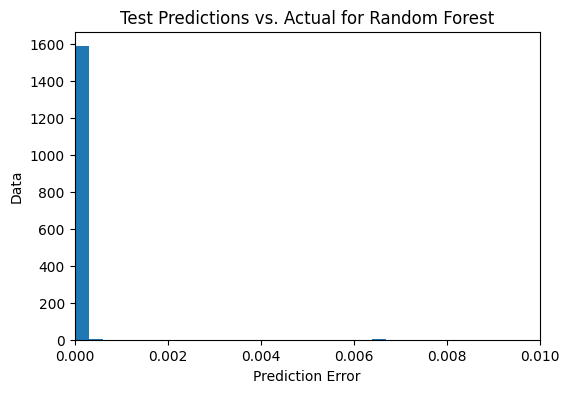

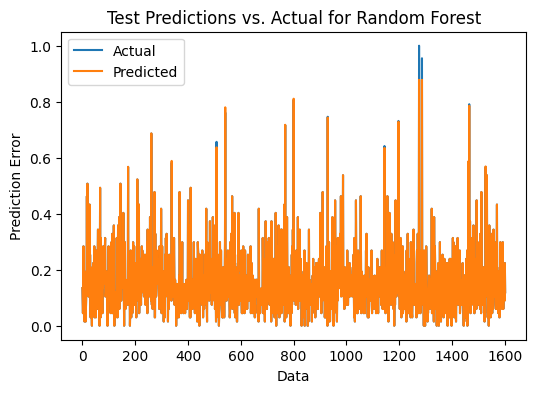

In [ ]:
import matplotlib.pyplot as plt

# 计算測試集的预测误差
error = np.abs(y_test - y_test_pred.flatten())

# 绘制预测误差的直方图
plt.figure(figsize=(6, 4))
plt.hist(error, bins=400)
plt.xlabel('Prediction Error')
plt.ylabel('Data')
plt.title('Test Predictions vs. Actual for Random Forest')
plt.xlim([0, 0.01])  # 固定x軸範圍
# plt.ylim([0, 1600])  # 固定y軸範圍
plt.show()

# 繪製預測值和實際值的折線圖
plt.figure(figsize=(6, 4))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Data')
plt.ylabel('Prediction Error')
plt.title('Test Predictions vs. Actual for Random Forest')
plt.legend()
plt.show()

# 動態 - MLP


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

# 读取数据并进行预处理
data = pd.read_csv('動態資料.csv')
data = data.drop(['Cloud'], axis=1)
data = data[~data.apply(lambda row: any('#' in str(cell) for cell in row), axis=1)]
data = data.dropna(axis=0, how='any')
data['TIME'] = pd.to_datetime(data['TIME'])
data['Year'] = data['TIME'].dt.year
data['Month'] = data['TIME'].dt.month
data['Day'] = data['TIME'].dt.day
data['Hour'] = data['TIME'].dt.hour
data = data.drop(['TIME'], axis=1)
scaler = MinMaxScaler()

# 删除非数值、浮点数的行
numeric_cols = ['AMB_TEMP', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5', 'RAINFALL', 'RH', 'SO2', 'THC', 'WD_HR', 'WIND_DIREC', 'WIND_SPEED', 'WS_HR', 'GloblRad']
data = data[numeric_cols].apply(pd.to_numeric, errors='coerce')
data = data.dropna(axis=0, how='any')
data_scaled = scaler.fit_transform(data)

# 划分输入和输出
X = data_scaled[:, [col for col in range(data_scaled.shape[1]) if col != 8]]  # 除第九列之外的所有列
y = data_scaled[:, 9]  # 通过索引位置获取第9列（PM2_5）

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建 MLP 模型
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[RootMeanSquaredError()])

# 训练模型
model.fit(X_train, y_train, epochs=80, batch_size=32, verbose=0)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算 RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("MLP RMSE:", rmse)


51/51 [==============================] - 0s 897us/step
MLP RMSE: 0.0022218898209915984


In [ ]:
data

array([[ 26.6 ,   2.39,   0.56,   0.24,  12.4 ,  17.5 ,  30.  ,   0.  ,
         30.  ,   0.  ,  97.  ,   0.5 ,   2.63, 147.  , 150.  ,   1.  ,
          0.5 ,   0.  ,   0.  ]])

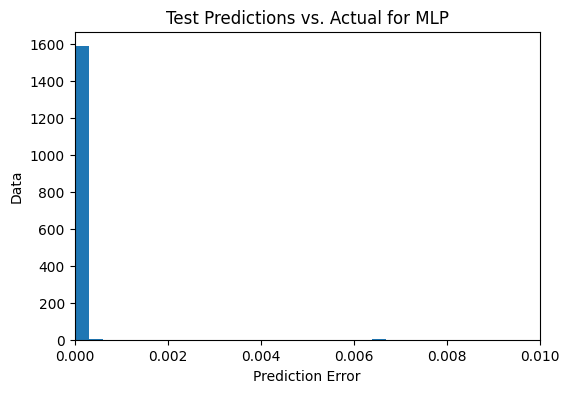

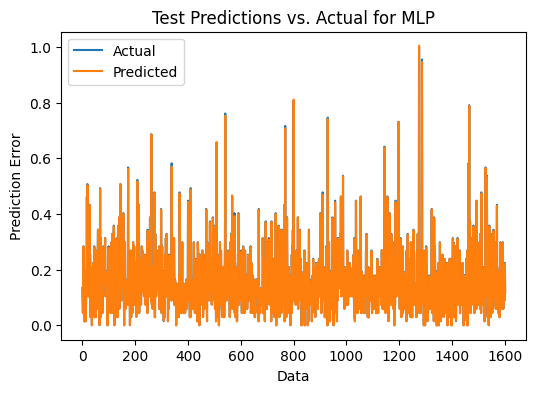

In [ ]:
import matplotlib.pyplot as plt

# 计算測試集的预测误差
error = np.abs(y_test - y_test_pred.flatten())

# 绘制预测误差的直方图
plt.figure(figsize=(6, 4))
plt.hist(error, bins=400)
plt.xlabel('Prediction Error')
plt.ylabel('Data')
plt.title('Test Predictions vs. Actual for MLP')
plt.xlim([0, 0.01])  # 固定x軸範圍
# plt.ylim([0, 1600])  # 固定y軸範圍
plt.show()

# 繪製預測值和實際值的折線圖
plt.figure(figsize=(6, 4))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Data')
plt.ylabel('Prediction Error')
plt.title('Test Predictions vs. Actual for MLP')
plt.legend()
plt.show()

# 動態 - GRU

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.metrics import RootMeanSquaredError

# 读取数据并进行预处理
data = pd.read_csv('動態資料.csv')
data = data.drop(['Cloud'], axis=1)
data = data[~data.apply(lambda row: any('#' in str(cell) for cell in row), axis=1)]
data = data.dropna(axis=0, how='any')
data['TIME'] = pd.to_datetime(data['TIME'])
data['Year'] = data['TIME'].dt.year
data['Month'] = data['TIME'].dt.month
data['Day'] = data['TIME'].dt.day
data['Hour'] = data['TIME'].dt.hour
data = data.drop(['TIME'], axis=1)
scaler = MinMaxScaler()

# 删除非数值、浮点数的行
numeric_cols = ['AMB_TEMP', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5', 'RAINFALL', 'RH', 'SO2', 'THC', 'WD_HR', 'WIND_DIREC', 'WIND_SPEED', 'WS_HR', 'GloblRad']
data = data[numeric_cols].apply(pd.to_numeric, errors='coerce')
data = data.dropna(axis=0, how='any')
data_scaled = scaler.fit_transform(data)

# 划分输入和输出
X = data_scaled[:, [col for col in range(data_scaled.shape[1]) if col != 8]] # 除第九列之外的所有列
y = data_scaled[:, 9] # 通过索引位置获取第9列（PM2_5）

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建 GRU 模型
model = Sequential()
model.add(GRU(128, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[RootMeanSquaredError()])

# 将输入数据调整为三维形状（样本数，时间步长，特征数）
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# 训练模型
model.fit(X_train, y_train, epochs=80, batch_size=32, verbose=0)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算 RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("GRU RMSE:", rmse)

51/51 [==============================] - 1s 7ms/step
GRU RMSE: 0.0045160722959233105


In [ ]:
from sklearn.model_selection import GridSearchCV

# 定义要调整的参数范围
param_grid = {
    'units': [32, 64, 128],
    'batch_size': [32, 64],
    'learning_rate': [0.001, 0.01, 0.1]
}

# 创建GRU模型
model = Sequential()
model.add(GRU(64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=[RootMeanSquaredError()])

# 进行网格搜索
grid_search = GridSearchCV(model, param_grid, scoring='neg_root_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# 输出最佳参数组合和对应的性能指标
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)


TypeError: ignored

In [ ]:
# model.get_config()

- 繪製圖表

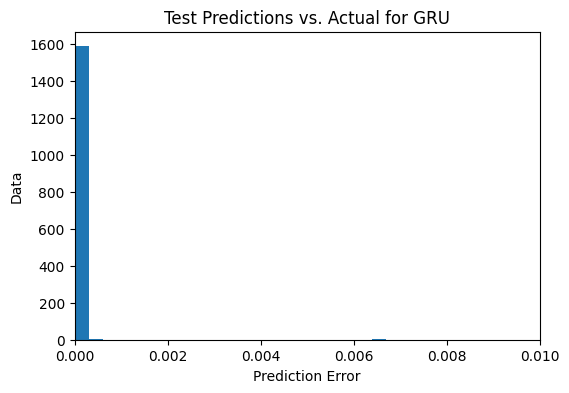

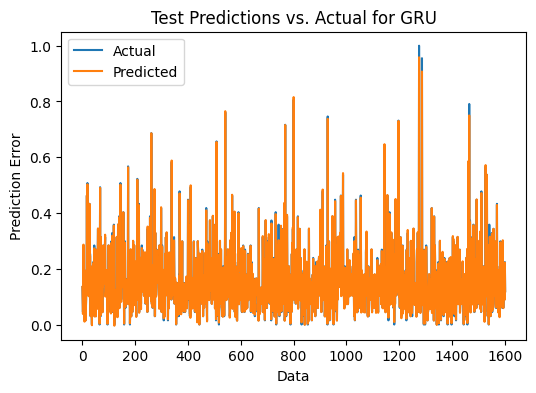

In [ ]:
import matplotlib.pyplot as plt

# 计算測試集的预测误差
error = np.abs(y_test - y_test_pred.flatten())

# 绘制预测误差的直方图
plt.figure(figsize=(6, 4))
plt.hist(error, bins=400)
plt.xlabel('Prediction Error')
plt.ylabel('Data')
plt.title('Test Predictions vs. Actual for GRU')
plt.xlim([0, 0.01])  # 固定x軸範圍
# plt.ylim([0, 1600])  # 固定y軸範圍
plt.show()

# 繪製預測值和實際值的折線圖
plt.figure(figsize=(6, 4))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Data')
plt.ylabel('Prediction Error')
plt.title('Test Predictions vs. Actual for GRU')
plt.legend()
plt.show()

# 動態 - LSTM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.metrics import RootMeanSquaredError

# 读取数据并进行预处理
data = pd.read_csv('動態資料.csv')
data = data.drop(['Cloud'], axis=1)
data = data[~data.apply(lambda row: any('#' in str(cell) for cell in row), axis=1)]
data = data.dropna(axis=0, how='any')
data['TIME'] = pd.to_datetime(data['TIME'])
data['Year'] = data['TIME'].dt.year
data['Month'] = data['TIME'].dt.month
data['Day'] = data['TIME'].dt.day
data['Hour'] = data['TIME'].dt.hour
data = data.drop(['TIME'], axis=1)
scaler = MinMaxScaler()

# 删除非数值、浮点数的行
numeric_cols = ['AMB_TEMP', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5', 'RAINFALL', 'RH', 'SO2', 'THC', 'WD_HR', 'WIND_DIREC', 'WIND_SPEED', 'WS_HR', 'GloblRad']
data = data[numeric_cols].apply(pd.to_numeric, errors='coerce')
data = data.dropna(axis=0, how='any')
data_scaled = scaler.fit_transform(data)

# 划分输入和输出
X = data_scaled[:, [col for col in range(data_scaled.shape[1]) if col != 8]]  # 除第九列之外的所有列
y = data_scaled[:, 9]  # 通过索引位置获取第9列（PM2_5）

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建 LSTM 模型
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[RootMeanSquaredError()])

# 将输入数据调整为三维形状（样本数，时间步长，特征数）
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# 训练模型
model.fit(X_train, y_train, epochs=80, batch_size=32, verbose=0)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算 RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("LSTM RMSE:", rmse)

51/51 [==============================] - 0s 5ms/step
LSTM RMSE: 0.003902995988464593


- 繪製圖表

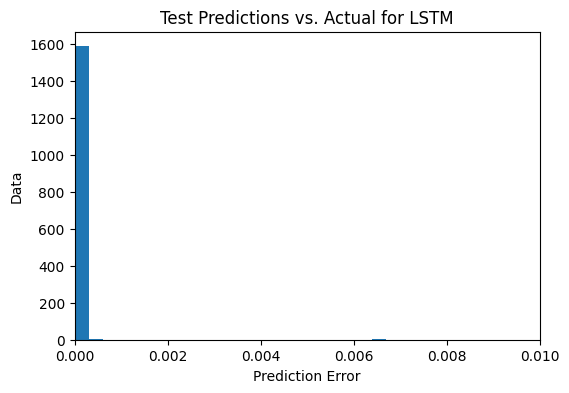

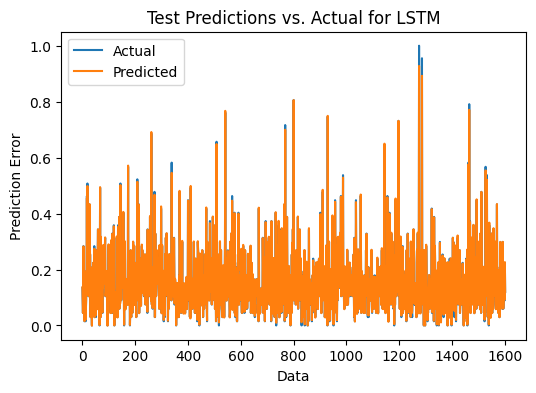

In [ ]:
import matplotlib.pyplot as plt

# 计算測試集的预测误差
error = np.abs(y_test - y_test_pred.flatten())

# 绘制预测误差的直方图
plt.figure(figsize=(6, 4))
plt.hist(error, bins=400)
plt.xlabel('Prediction Error')
plt.ylabel('Data')
plt.title('Test Predictions vs. Actual for LSTM')
plt.xlim([0, 0.01])  # 固定x軸範圍
# plt.ylim([0, 1600])  # 固定y軸範圍
plt.show()

# 繪製預測值和實際值的折線圖
plt.figure(figsize=(6, 4))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Data')
plt.ylabel('Prediction Error')
plt.title('Test Predictions vs. Actual for LSTM')
plt.legend()
plt.show()

In [ ]:
# 获取列名列表
columns = data.columns.tolist()

# 查找"PM2_5"所在的索引位置
pm2_5_index = columns.index("PM2_5")
print('pm2_5_index:',pm2_5_index)

# print("PM2_5 is located at column index:", pm2_5_index)
data.head()

pm2_5_index: 9


,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2_5,...,WIND_DIREC,WIND_SPEED,WS_HR,GloblRad,UVI,Youbike,Year,Month,Day,Hour
0,15.3,2.12,0.26,0.05,0.7,10.7,11.4,35.2,12,10,...,98,2.0,1.7,0.0,0,8,2022,1,1,0
1,15.3,2.14,0.31,0.05,0.8,12,12.8,33.8,13,8,...,100,1.7,1.6,0.0,0,10,2022,1,1,1
2,15.4,2.18,0.3,0.05,0.4,10.1,10.5,34.6,15,11,...,106,1.0,1.2,0.0,0,14,2022,1,1,2
3,15.5,2.19,0.29,0.06,0.5,9.5,10.1,34.5,14,9,...,91,1.9,1.3,0.0,0,4,2022,1,1,3
4,15.5,2.17,0.29,0.06,0.4,7.6,8,36.5,19,12,...,112,1.7,1.4,0.0,0,9,2022,1,1,4


# 動態 - RNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

# 读取数据并进行预处理
data = pd.read_csv('動態資料.csv')
data = data.drop(['Cloud'], axis=1)
data = data[~data.apply(lambda row: any('#' in str(cell) for cell in row), axis=1)]
data = data.dropna(axis=0, how='any')
data['TIME'] = pd.to_datetime(data['TIME'])
data['Year'] = data['TIME'].dt.year
data['Month'] = data['TIME'].dt.month
data['Day'] = data['TIME'].dt.day
data['Hour'] = data['TIME'].dt.hour
data = data.drop(['TIME'], axis=1)
scaler = MinMaxScaler()
# 删除非数值、浮点数的行
data = data[numeric_cols].apply(pd.to_numeric, errors='coerce')
data = data.dropna(axis=0, how='any')

data_scaled = scaler.fit_transform(data)

# 划分输入和输出
X = data_scaled[:, [col for col in range(data_scaled.shape[1]) if col != 8]] #除第九列之外的所有列
y = data_scaled[:, 9]  # 通过索引位置获取第9列（PM2_5）


# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建 RNN 模型
model = Sequential()
model.add(SimpleRNN(64, input_shape=(X_train.shape[1], 1)))  # 可根据需要调整 RNN 层的参数
model.add(Dense(1))

# 编译和训练模型
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=10, batch_size=16)

# 在测试集上进行预测
y_pred = model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))

# 计算 RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RNN RMSE:", rmse)


Epoch 1/10
105/105 [==============================] - 4s 8ms/step - loss: 0.0108
Epoch 2/10
105/105 [==============================] - 1s 7ms/step - loss: 5.2899e-04
Epoch 3/10
105/105 [==============================] - 1s 6ms/step - loss: 1.6316e-04
Epoch 4/10
105/105 [==============================] - 1s 5ms/step - loss: 1.3551e-04
Epoch 5/10
105/105 [==============================] - 1s 5ms/step - loss: 1.2424e-04
Epoch 6/10
105/105 [==============================] - 1s 5ms/step - loss: 9.6081e-05
Epoch 7/10
105/105 [==============================] - 1s 5ms/step - loss: 1.1553e-04
Epoch 8/10
105/105 [==============================] - 1s 5ms/step - loss: 8.3636e-05
Epoch 9/10
105/105 [==============================] - 1s 5ms/step - loss: 9.7155e-05
Epoch 10/10
14/14 [==============================] - 0s 2ms/step
RNN RMSE: 0.011197777856721026


##載入中文字體

In [ ]:
# 下載台北思源黑體
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2023-07-21 08:42:42--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 108.177.13.101, 108.177.13.100, 108.177.13.113, ...
Connecting to drive.google.com (drive.google.com)|108.177.13.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n72f0evjl27m9q8605ndpf5rv00mqi4s/1689928950000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=a3c5b4aa-712f-45e1-86bf-8bc14fd51282 [following]
--2023-07-21 08:42:45--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n72f0evjl27m9q8605ndpf5rv00mqi4s/1689928950000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=a3c5b4aa-712f-45e1-86bf-8bc14fd51282
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 173.194.215.132, 2607:f8b0:400c:c0c::84
Connecting to doc-0

# 動態 - 皮爾遜相關係數

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

data = pd.read_csv('靜態_相關性_最大.csv', encoding='big5')

correlation_matrix = data.corr(method='pearson')

# 打印与'PM2.5'列的相关性
pm25_correlation = correlation_matrix['PM2.5最大']
print(pm25_correlation)

# 获取前三个最相关的特征
top_related_features = pm25_correlation.abs().nlargest(4).index[1:].tolist()
# top_related_features = pm25_correlation.abs().nlargest(3).index.tolist()

# 获取前三个最不相关的特征
top_unrelated_features = pm25_correlation.abs().nsmallest(3).index.tolist()

print("前三個最相關的特徵：", top_related_features)
print("前三個最不相關的特徵：", top_unrelated_features)


PM2.5最大         1.000000
人口密度           -0.524909
遷入人數           -0.564098
遷出人數           -0.650784
工業              0.572565
服務業            -0.628985
農林漁牧            0.598920
可支配所得          -0.706932
工業區分布           0.760940
Covid確診數       -0.122941
機動車輛登記數        -0.065705
假日_出口          -0.467048
平日_出口          -0.468372
交通死傷數           0.576816
大型焚化廠處理量       -0.042351
營造業家數           0.067752
都市計畫區面積        -0.301188
違反列管毒性化學運作家次    0.015194
事業廢水列管家數        0.280878
豬隻密度            0.615629
工廠密度           -0.237076
營運中工廠數         -0.035720
道路面積            0.525328
台電售電量           0.689926
森林佔土地比         -0.367738
觀光旅館住用率         0.105368
Name: PM2.5最大, dtype: float64
前三個最相關的特徵： ['工業區分布', '可支配所得', '台電售電量']
前三個最不相關的特徵： ['違反列管毒性化學運作家次', '營運中工廠數', '大型焚化廠處理量']


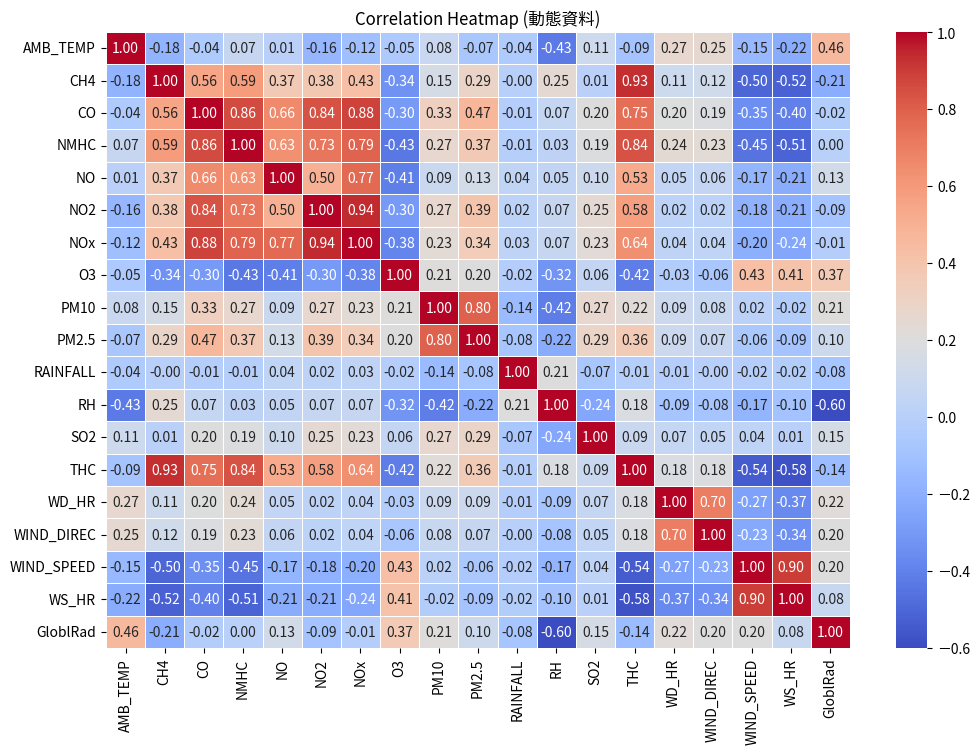

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.metrics import RootMeanSquaredError

# 读取数据并进行预处理
data = pd.read_csv('動態資料.csv')
data = data.drop(['TIME','Cloud'], axis=1)
data = data[~data.apply(lambda row: any('#' in str(cell) for cell in row), axis=1)]
data = data.dropna(axis=0, how='any')
scaler = MinMaxScaler()

# 删除非数值、浮点数的行
numeric_cols = ['AMB_TEMP', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5', 'RAINFALL', 'RH', 'SO2', 'THC', 'WD_HR', 'WIND_DIREC', 'WIND_SPEED', 'WS_HR', 'GloblRad']
data = data[numeric_cols].apply(pd.to_numeric, errors='coerce')
data = data.dropna(axis=0, how='any')
data_scaled = scaler.fit_transform(data)

# 計算相關性
correlation_matrix = data.corr(numeric_only=False)

import seaborn as sns
import matplotlib.pyplot as plt

# 繪製熱力圖
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (動態資料)')
plt.show()



In [ ]:
# 取得相關性矩陣中PM2.5這一列的相關性
pm25_correlation = correlation_matrix['PM2.5']

# 取得相關性矩陣中PM2.5最相關的前五項
top_pm25_corr = pm25_correlation.sort_values(ascending=False)[1:6]

# 取得相關性矩陣中PM2.5最不相關的前五項
bottom_pm25_corr = pm25_correlation.sort_values(ascending=True)[:5]

# 列印結果
print("與PM2.5正相關的前五項排名：")
print(top_pm25_corr)
print("\n與PM2.5負相關的前五項排名：")
print(bottom_pm25_corr)


與PM2.5正相關的前五項排名：
PM10    0.796916
CO      0.473959
NO2     0.394481
NMHC    0.370253
THC     0.358957
Name: PM2.5, dtype: float64

與PM2.5負相關的前五項排名：
RH           -0.215601
WS_HR        -0.090447
RAINFALL     -0.080279
AMB_TEMP     -0.065485
WIND_SPEED   -0.057395
Name: PM2.5, dtype: float64


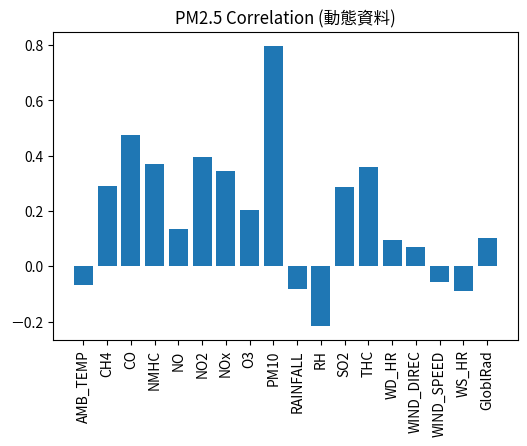

In [ ]:
import matplotlib.pyplot as plt

# 取得PM2.5的相關性
pm25_correlation = correlation_matrix['PM2.5']

# 排除PM2.5本身的相關性
pm25_correlation = pm25_correlation.drop('PM2.5')

# 設置圖表大小
plt.figure(figsize=(6, 4))

# 繪製長條圖
plt.bar(pm25_correlation.index, pm25_correlation.values)

# 設置標籤和標題
# plt.xlabel('變數')
# plt.ylabel('相關性')
plt.title('PM2.5 Correlation (動態資料)')

# 調整x軸標籤旋轉角度
plt.xticks(rotation=90)

# 顯示圖表
plt.show()
